In [1]:
import pandas as pd

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
submission=pd.read_csv('gender_submission.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
train_df['Sex'].value_counts().plot(kind='bar')

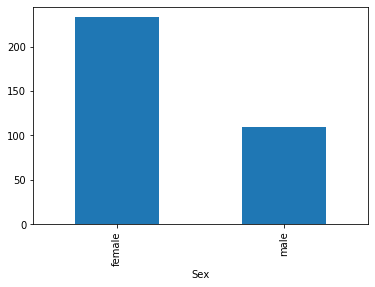

In [6]:
train_df.groupby('Sex')['Survived'].sum().plot(kind='bar')

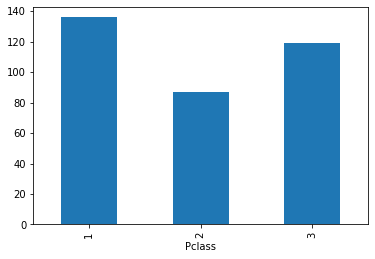

In [7]:
train_df.groupby('Pclass')['Survived'].sum().plot(kind='bar')

In [8]:
train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [9]:
train_df.loc[train_df['Fare']==train_df['Fare'].max(),['Sex','Survived','Name']]

,Sex,Survived,Name
258,1,1,"Ward, Miss. Anna"
679,0,1,"Cardeza, Mr. Thomas Drake Martinez"
737,0,1,"Lesurer, Mr. Gustave J"


In [10]:
train_df.loc[train_df['Fare']==train_df['Fare'].min(),['Sex','Survived','Name','Pclass']]

,Sex,Survived,Name,Pclass
179,0,0,"Leonard, Mr. Lionel",3
263,0,0,"Harrison, Mr. William",1
271,0,1,"Tornquist, Mr. William Henry",3
277,0,0,"Parkes, Mr. Francis ""Frank""",2
302,0,0,"Johnson, Mr. William Cahoone Jr",3
413,0,0,"Cunningham, Mr. Alfred Fleming",2
466,0,0,"Campbell, Mr. William",2
481,0,0,"Frost, Mr. Anthony Wood ""Archie""",2
597,0,0,"Johnson, Mr. Alfred",3
633,0,0,"Parr, Mr. William Henry Marsh",1


In [11]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [13]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [14]:
X_train=train_df.loc[:,['PassengerId','Pclass','Age','Parch','SibSp','Fare','Sex']]

In [15]:
X_train.dtypes

PassengerId      int64
Pclass           int64
Age            float64
Parch            int64
SibSp            int64
Fare           float64
Sex              int32
dtype: object

In [16]:
y_train=train_df.loc[:,'Survived']

In [17]:
X_test=test_df.loc[:,['PassengerId','Pclass','Age','Parch','SibSp','Fare','Sex']]

In [18]:
X_train[['Age']] = X_train[['Age']].fillna(value=X_train[['Age']].mean())

In [19]:
X_train=X_train.values

In [20]:
y_train=y_train.values

In [21]:
X_train.shape

(891, 7)

In [22]:
y_train.shape

(891,)

In [23]:
from keras.models import Sequential
from keras import layers

Using TensorFlow backend.


In [24]:
model=Sequential()

In [25]:
model.add(layers.Dense(128,activation='relu',input_shape=(7,)))
model.add(layers.Dense(120,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 120)               15480     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 121       
Total params: 16,625
Trainable params: 16,625
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
history=model.fit(X_train,y_train,epochs=500)

Epoch 1/500
891/891 [==============================] - 0s 150us/step - loss: 9.6797 - accuracy: 0.5286
Epoch 2/500
891/891 [==============================] - 0s 28us/step - loss: 5.8495 - accuracy: 0.5600
Epoch 3/500
891/891 [==============================] - 0s 30us/step - loss: 5.0205 - accuracy: 0.5466
Epoch 4/500
891/891 [==============================] - 0s 26us/step - loss: 4.2075 - accuracy: 0.5915
Epoch 5/500
891/891 [==============================] - 0s 30us/step - loss: 4.5085 - accuracy: 0.5746
Epoch 6/500
891/891 [==============================] - 0s 27us/step - loss: 4.2759 - accuracy: 0.5612
Epoch 7/500
891/891 [==============================] - 0s 29us/step - loss: 3.9248 - accuracy: 0.5746
Epoch 8/500
891/891 [==============================] - 0s 29us/step - loss: 3.9891 - accuracy: 0.5836
Epoch 9/500
891/891 [==============================] - 0s 30us/step - loss: 3.5075 - accuracy: 0.5870
Epoch 10/500
891/891 [==============================] - 0s 27us/step - loss: 3.45

891/891 [==============================] - 0s 29us/step - loss: 0.6565 - accuracy: 0.7531
Epoch 81/500
891/891 [==============================] - 0s 29us/step - loss: 0.6299 - accuracy: 0.7430
Epoch 82/500
891/891 [==============================] - 0s 28us/step - loss: 0.6119 - accuracy: 0.7520
Epoch 83/500
891/891 [==============================] - 0s 27us/step - loss: 0.6036 - accuracy: 0.7542
Epoch 84/500
891/891 [==============================] - 0s 28us/step - loss: 0.6489 - accuracy: 0.7306
Epoch 85/500
891/891 [==============================] - 0s 28us/step - loss: 0.5760 - accuracy: 0.7598
Epoch 86/500
891/891 [==============================] - 0s 29us/step - loss: 0.5853 - accuracy: 0.7452
Epoch 87/500
891/891 [==============================] - 0s 26us/step - loss: 0.5989 - accuracy: 0.7542
Epoch 88/500
891/891 [==============================] - 0s 29us/step - loss: 0.5746 - accuracy: 0.7363
Epoch 89/500
891/891 [==============================] - 0s 27us/step - loss: 0.5747 - 

891/891 [==============================] - 0s 27us/step - loss: 0.4357 - accuracy: 0.8204
Epoch 160/500
891/891 [==============================] - 0s 27us/step - loss: 0.4403 - accuracy: 0.8092
Epoch 161/500
891/891 [==============================] - 0s 27us/step - loss: 0.4424 - accuracy: 0.8159
Epoch 162/500
891/891 [==============================] - 0s 28us/step - loss: 0.4302 - accuracy: 0.8114
Epoch 163/500
891/891 [==============================] - 0s 27us/step - loss: 0.4497 - accuracy: 0.8002
Epoch 164/500
891/891 [==============================] - 0s 27us/step - loss: 0.4274 - accuracy: 0.7946
Epoch 165/500
891/891 [==============================] - 0s 27us/step - loss: 0.4225 - accuracy: 0.8171
Epoch 166/500
891/891 [==============================] - 0s 26us/step - loss: 0.4304 - accuracy: 0.8081
Epoch 167/500
891/891 [==============================] - 0s 26us/step - loss: 0.4337 - accuracy: 0.8148
Epoch 168/500
891/891 [==============================] - 0s 27us/step - loss: 

891/891 [==============================] - 0s 29us/step - loss: 0.3917 - accuracy: 0.8238
Epoch 238/500
891/891 [==============================] - 0s 26us/step - loss: 0.3963 - accuracy: 0.8328
Epoch 239/500
891/891 [==============================] - 0s 28us/step - loss: 0.3891 - accuracy: 0.8305
Epoch 240/500
891/891 [==============================] - 0s 26us/step - loss: 0.3985 - accuracy: 0.8272
Epoch 241/500
891/891 [==============================] - 0s 27us/step - loss: 0.4041 - accuracy: 0.8238
Epoch 242/500
891/891 [==============================] - 0s 27us/step - loss: 0.3910 - accuracy: 0.8283
Epoch 243/500
891/891 [==============================] - 0s 28us/step - loss: 0.4122 - accuracy: 0.8272
Epoch 244/500
891/891 [==============================] - 0s 27us/step - loss: 0.4016 - accuracy: 0.8316
Epoch 245/500
891/891 [==============================] - 0s 26us/step - loss: 0.4057 - accuracy: 0.8294
Epoch 246/500
891/891 [==============================] - 0s 27us/step - loss: 

891/891 [==============================] - 0s 27us/step - loss: 0.3890 - accuracy: 0.8238
Epoch 316/500
891/891 [==============================] - 0s 26us/step - loss: 0.3653 - accuracy: 0.8328
Epoch 317/500
891/891 [==============================] - 0s 27us/step - loss: 0.3883 - accuracy: 0.8227
Epoch 318/500
891/891 [==============================] - 0s 26us/step - loss: 0.3637 - accuracy: 0.8395
Epoch 319/500
891/891 [==============================] - 0s 27us/step - loss: 0.3856 - accuracy: 0.8328
Epoch 320/500
891/891 [==============================] - 0s 26us/step - loss: 0.3679 - accuracy: 0.8305
Epoch 321/500
891/891 [==============================] - 0s 26us/step - loss: 0.3970 - accuracy: 0.8305
Epoch 322/500
891/891 [==============================] - 0s 27us/step - loss: 0.3640 - accuracy: 0.8429
Epoch 323/500
891/891 [==============================] - 0s 26us/step - loss: 0.3629 - accuracy: 0.8339
Epoch 324/500
891/891 [==============================] - 0s 27us/step - loss: 

891/891 [==============================] - 0s 25us/step - loss: 0.3456 - accuracy: 0.8507
Epoch 394/500
891/891 [==============================] - 0s 26us/step - loss: 0.3619 - accuracy: 0.8440
Epoch 395/500
891/891 [==============================] - 0s 25us/step - loss: 0.3485 - accuracy: 0.8429
Epoch 396/500
891/891 [==============================] - 0s 27us/step - loss: 0.3591 - accuracy: 0.8373
Epoch 397/500
891/891 [==============================] - 0s 27us/step - loss: 0.3662 - accuracy: 0.8440
Epoch 398/500
891/891 [==============================] - 0s 27us/step - loss: 0.3738 - accuracy: 0.8519
Epoch 399/500
891/891 [==============================] - 0s 26us/step - loss: 0.3551 - accuracy: 0.8429
Epoch 400/500
891/891 [==============================] - 0s 27us/step - loss: 0.3530 - accuracy: 0.8328
Epoch 401/500
891/891 [==============================] - 0s 27us/step - loss: 0.3403 - accuracy: 0.8519
Epoch 402/500
891/891 [==============================] - 0s 26us/step - loss: 

891/891 [==============================] - 0s 26us/step - loss: 0.3374 - accuracy: 0.8474
Epoch 472/500
891/891 [==============================] - 0s 27us/step - loss: 0.3302 - accuracy: 0.8429
Epoch 473/500
891/891 [==============================] - 0s 26us/step - loss: 0.3315 - accuracy: 0.8507
Epoch 474/500
891/891 [==============================] - 0s 27us/step - loss: 0.3454 - accuracy: 0.8418
Epoch 475/500
891/891 [==============================] - 0s 26us/step - loss: 0.3327 - accuracy: 0.8418
Epoch 476/500
891/891 [==============================] - 0s 26us/step - loss: 0.3289 - accuracy: 0.8620
Epoch 477/500
891/891 [==============================] - 0s 26us/step - loss: 0.3331 - accuracy: 0.8451
Epoch 478/500
891/891 [==============================] - 0s 27us/step - loss: 0.3491 - accuracy: 0.8406
Epoch 479/500
891/891 [==============================] - 0s 29us/step - loss: 0.3237 - accuracy: 0.8552
Epoch 480/500
891/891 [==============================] - 0s 29us/step - loss: 

In [29]:
import matplotlib.pyplot as plt

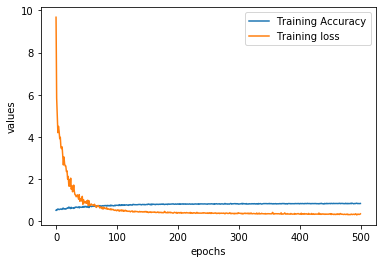

In [30]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['loss'],label='Training loss')
plt.xlabel('epochs')
plt.ylabel('values')
plt.legend()
plt.show()

In [31]:
X_test[['Age']] = X_test[['Age']].fillna(value=X_test[['Age']].mean())

In [32]:
X_test['Sex'] = X_test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [33]:
y_pred=model.predict_classes(X_test)

C:\Users\yousuf\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\engine\sequential.py:272: RuntimeWarning: invalid value encountered in greater
  return (proba > 0.5).astype('int32')


In [34]:
y_pred.shape=y_pred.reshape(418).shape

In [35]:
submissiondf=pd.DataFrame({'PassengerID':X_test.PassengerId,'Survived':y_pred})

In [36]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [37]:
submissiondf

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


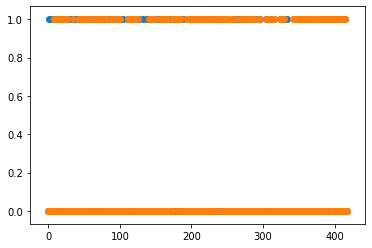

In [38]:
plt.scatter(submission.index,submission.Survived)
plt.scatter(submissiondf.index,submissiondf.Survived)
plt.show()

In [39]:
import numpy as np

In [40]:
np.where(submission.Survived==submissiondf.Survived)

(array([  0,   2,   3,   5,   7,   8,   9,  10,  11,  12,  13,  14,  15,
         16,  17,  22,  25,  26,  27,  28,  29,  30,  31,  35,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  51,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  65,  66,  68,  69,  71,  73,
         74,  75,  76,  77,  78,  82,  83,  84,  85,  87,  91,  92,  93,
         94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 105, 106, 107,
        108, 109, 110, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122,
        123, 124, 125, 126, 128, 129, 130, 131, 133, 134, 135, 136, 137,
        139, 141, 143, 144, 145, 147, 148, 149, 150, 151, 152, 154, 155,
        156, 158, 162, 163, 164, 167, 168, 170, 171, 172, 173, 174, 175,
        176, 178, 179, 180, 182, 183, 184, 185, 186, 187, 189, 190, 191,
        192, 193, 195, 197, 198, 202, 203, 204, 205, 207, 208, 209, 210,
        211, 213, 215, 218, 219, 221, 222, 223, 224, 226, 228, 229, 231,
        232, 233, 235, 237, 238, 239, 240, 241, 243

In [41]:
model.save('titanic.h5')
print('save to disk')

save to disk


In [43]:
from keras.models import load_model

In [44]:
loaded_model=load_model('titanic.h5')

In [46]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 120)               15480     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 121       
Total params: 16,625
Trainable params: 16,625
Non-trainable params: 0
_________________________________________________________________
